In [110]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2, fftshift

In [111]:
SOURCE_DIR = '../tests/test_images'

In [112]:
def load_image(filename):
    return cv2.imread(f"{SOURCE_DIR}/{filename}")

In [113]:
def show_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [114]:
hided_image = load_image('dog.jpg').astype(np.uint8)
source_image = load_image('sunset.jpg').astype(np.uint8)

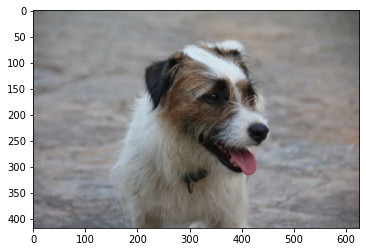

In [115]:
show_image(hided_image)

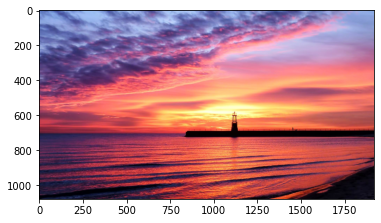

In [116]:
show_image(source_image)

In [117]:
def generate_pixel_mapping(hid, src):
    hidden_image_coords = np.argwhere(hid[:,:,0] >= 0)
    source_image_coords = np.argwhere(src[:,:,0] >= 0)
    np.random.seed(42)
    np.random.shuffle(source_image_coords)
    print(hid.shape[0]*hid.shape[1], hidden_image_coords.shape[0])
    return list(zip(hidden_image_coords, source_image_coords[:hidden_image_coords.shape[0]]))

def shuffle_image(hid, src, shuffling_matrix):
    result = np.zeros(src.shape, dtype=np.uint8)
    for hidden_, source_ in shuffling_matrix:
        result[source_[0],source_[1]] = hid[hidden_[0],hidden_[1]]
    return result

def unshuffle_image(tmp, shuffling_matrix):
    result = np.zeros(tmp.shape, dtype=np.uint8)
    for source_, hidden_ in shuffling_matrix:
        result[source_[0],source_[1]] = tmp[hidden_[0],hidden_[1]]
    return result

my_mat = np.array([[[0,0,255],[0,0,255],[0,0,255]],
                   [[0,255,0],[0,255,0],[0,255,0]],
                   [[255,0,0],[255,0,0],[255,0,0]]])



262086 262086


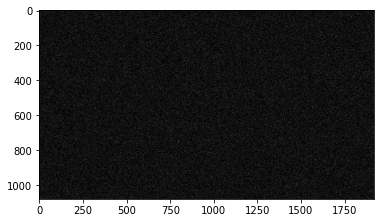

In [118]:
shuffling_matrix = generate_pixel_mapping(hided_image, source_image)
temp = shuffle_image(hided_image, source_image, shuffling_matrix)
show_image(temp)

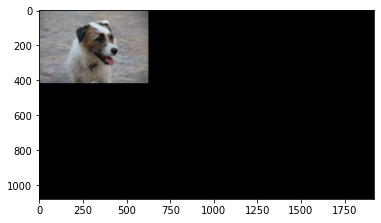

In [119]:
final_image = unshuffle_image(temp, shuffling_matrix)
show_image(final_image)

In [120]:
shuffling_matrix = generate_pixel_mapping(hided_image, source_image)
alpha = 3

262086 262086


In [121]:
def encode_image(source_image, hided_image):
    source_frequency = fft2(source_image)

    hidden_h, hidden_w , _ = hided_image.shape
    hiding_layer = shuffle_image(hided_image, source_image, shuffling_matrix)
    result_frequency = source_frequency + alpha * hiding_layer

    result_image = np.fft.ifft2(result_frequency)
    result_image = np.real(result_image)
    result_image = result_image.astype(np.uint8)
    return result_image

262086 262086


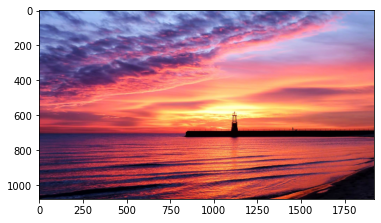

In [122]:
shuffling_matrix = generate_pixel_mapping(hided_image, hided_image)

encoded_image = encode_image(source_image, hided_image)
show_image(encoded_image)

In [123]:
def decode_image(source_image, encoded_image):
    encoded_frequency = np.fft.fft2(encoded_image)
    source_frequency = np.fft.fft2(source_image)

    hiden_layer = (source_frequency - encoded_frequency) / alpha

    hiden_layer = np.real(hiden_layer).astype(np.uint8)
    hiden_layer = unshuffle_image(hiden_layer, shuffling_matrix)

    return hiden_layer

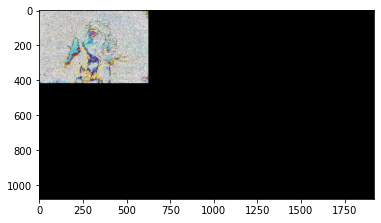

In [124]:
decoded_image = decode_image(source_image, encoded_image)

show_image(decoded_image)